# Intermediate Data Visualization with Seaborn

¿Quieres crear visualizaciones hermosas e informativas con facilidad? Si es así, ¡debes aprender a nadar en el mar! 
**Seaborn es una biblioteca de visualización** que es una parte esencial del **kit de herramientas de ciencia de datos de Python**. En este curso, aprenderá a utilizar las sofisticadas herramientas de visualización de seaborn para analizar múltiples conjuntos de datos del mundo real, incluida la Encuesta Estadounidense de Vivienda, datos de matrículas universitarias e invitados de la popular serie de televisión The Daily Show. Siguiendo este curso, podrá utilizar las funciones de seaborn para visualizar sus datos en varios formatos diferentes y personalizar los gráficos de seaborn para sus necesidades únicas. 

# 1. Seaborn Introduction

### Introduction to Seaborn


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/2010 US School Improvement Grants.csv")
us_worst_drives = pd.read_csv("../datasets/Automobile Insurance Premiums.csv")
us_housing = pd.read_csv("../datasets/US Housing.csv")
daily_show_guests = pd.read_csv("../datasets/Daily Show Guests.csv")
college = pd.read_csv("../datasets/College Scorecard Tuition.csv")
bike_share = pd.read_csv("../datasets/Washington DC Bike Share.csv")

df.head(3)

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West


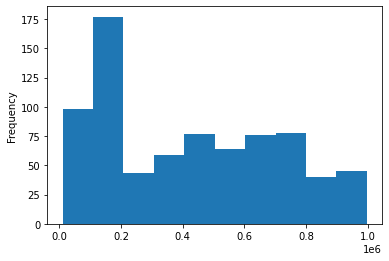

<Figure size 432x288 with 0 Axes>

In [5]:
df['Award_Amount'].plot.hist()
plt.show()
plt.clf()

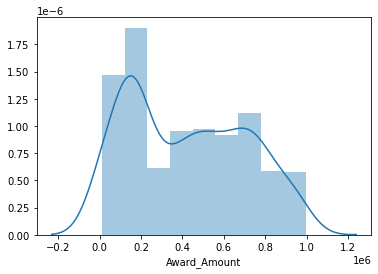

<Figure size 432x288 with 0 Axes>

In [8]:
# Seaborn:  El distplot es similar al histograma
# De forma predeterminada, genera estimación de densidad del kernel gaussiano (KDE)
# KDE ayuda a suavizar la distribución y es una forma útil de ver los datos.
sns.distplot(df['Award_Amount'])
plt.show()
plt.clf()

### Using the distribution plot


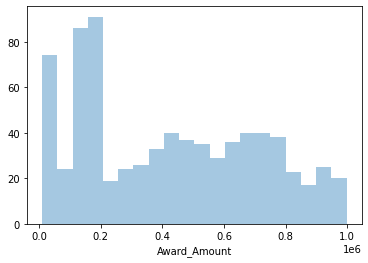

In [16]:
sns.distplot(df['Award_Amount'],
             kde=False,
             bins=20)

plt.show()

<AxesSubplot:xlabel='Award_Amount'>

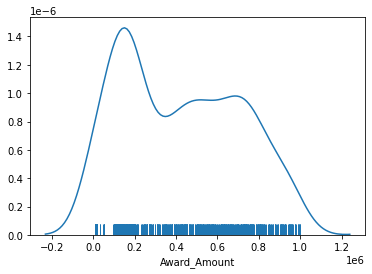

In [19]:
# rug plot  => forma alternativa de ver la distribución de datos 
sns.distplot(df['Award_Amount'], hist=False, rug=True)

<AxesSubplot:xlabel='Award_Amount'>

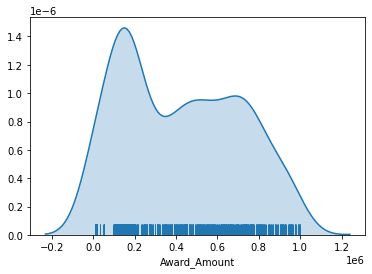

In [21]:
# kde_kws => Sombreado
sns.distplot(df['Award_Amount'], hist=False,              
             rug=True, kde_kws={'shade':True})

### Regression Plots in Seaborn

In [ ]:
# ANALISIS UNIVARIANTE
# regplot => BASE PARA REGRESION LINEAL EN SEABORN

In [23]:
us_worst_drives.head(3)

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West


<AxesSubplot:xlabel='insurance_losses', ylabel='premiums'>

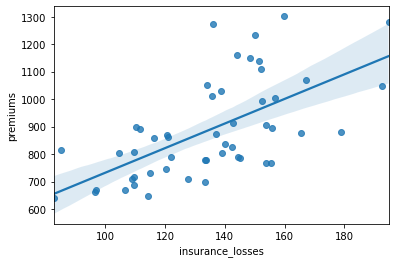

In [24]:
sns.regplot(x="insurance_losses", y="premiums", data=us_worst_drives)

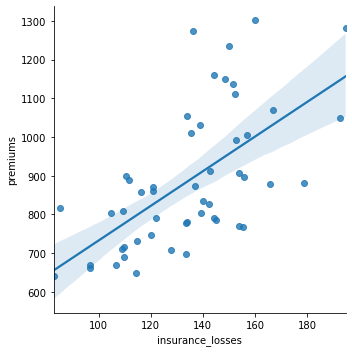

In [25]:
sns.lmplot(x="insurance_losses",y="premiums",data=us_worst_drives)

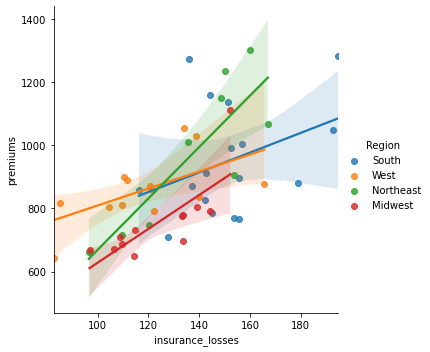

In [26]:
sns.lmplot(data=us_worst_drives,
           x="insurance_losses",
           y="premiums",
           hue="Region")
plt.show()

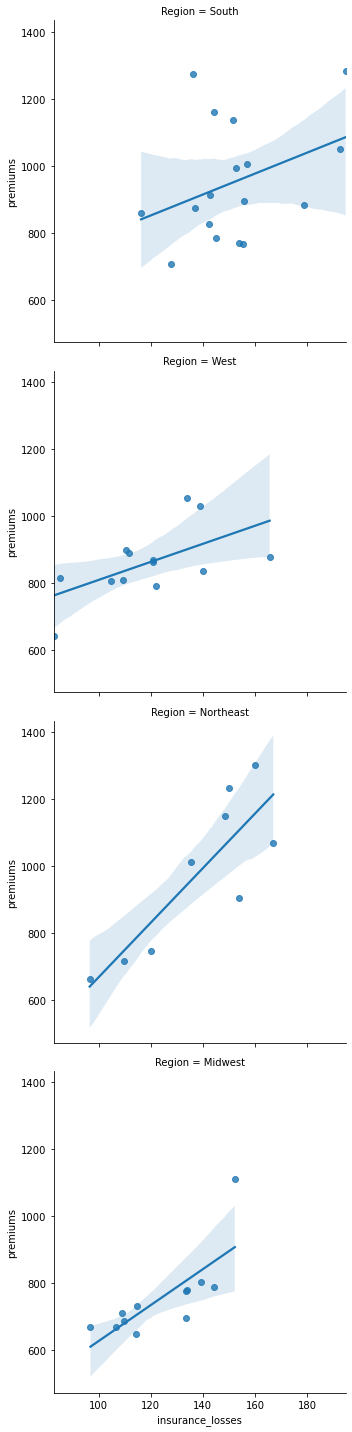

In [27]:
sns.lmplot(data=us_worst_drives,
           x="insurance_losses",
           y="premiums",
           row="Region") # col = "Region"
plt.show()

# 2.Customizing Seaborn Plots

### Using Seaborn Styles

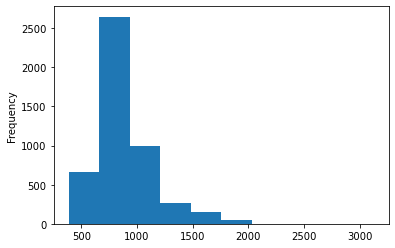

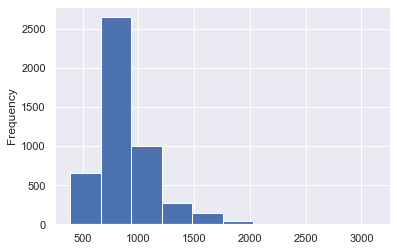

<Figure size 432x288 with 0 Axes>

In [31]:
us_housing['fmr_2'].plot.hist()
plt.show()
plt.clf()


# sns.set() => ESTABLECER ESTILO PREDETERMINADO A SEABORN
sns.set()
us_housing['fmr_2'].plot.hist()
plt.show()
plt.clf()

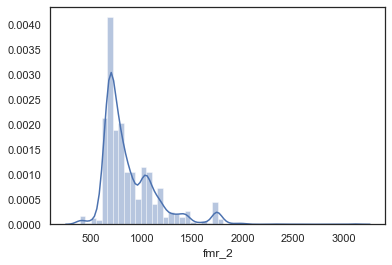

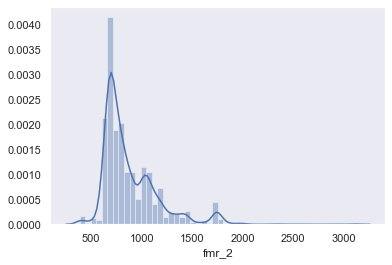

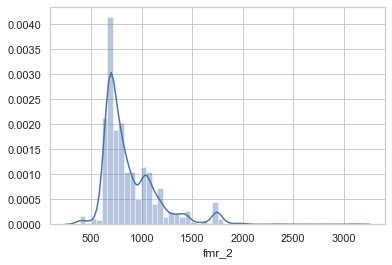

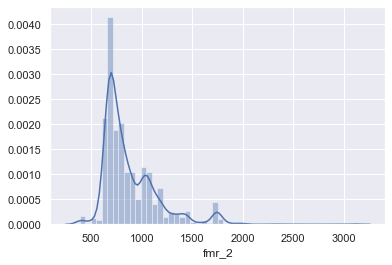

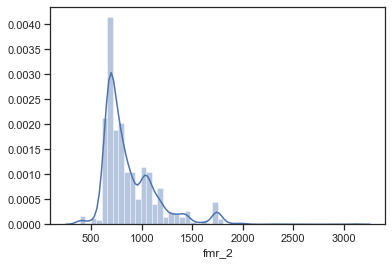

In [35]:
for style in ['white','dark','whitegrid',
              'darkgrid','ticks']:    
    sns.set_style(style)    
    sns.distplot(us_housing['fmr_2'])    
    plt.show()

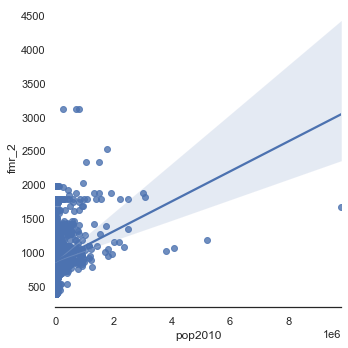

<Figure size 432x288 with 0 Axes>

In [38]:
# sns.despine() => Eliminando espinas
sns.set_style('white')
sns.lmplot(data=us_housing,
           x='pop2010',
           y='fmr_2')

sns.despine(left=True)
plt.show()
plt.clf()

### Colors in Seaborn

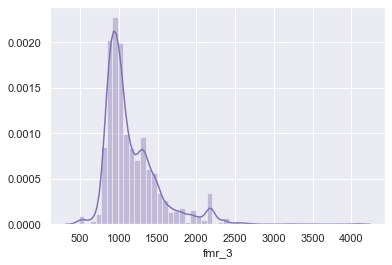

In [39]:
# Seaborn tambien puede trabajar con colores de Matplotlib 
sns.set(color_codes=True)
sns.distplot(us_housing['fmr_3'], color='m')

plt.show()

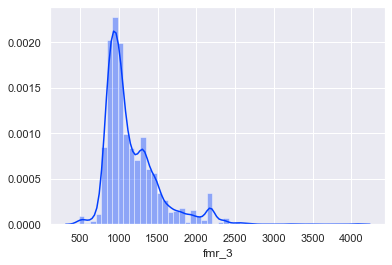

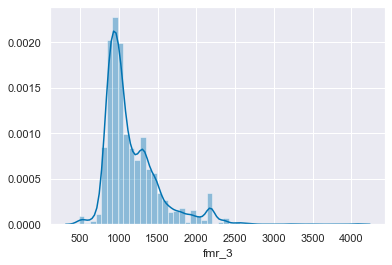

<Figure size 432x288 with 0 Axes>

In [41]:
# bright => brillante
# colorblind => daltonica

for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.distplot(us_housing['fmr_3'])
    plt.show()
    plt.clf()

In [50]:
# sns.palplot() => muestra la paleta
# sns.color_palette() => devuelve el color de la actual paleta

# Circular colors => cuando la data no esta ordenada
# Diverging colors => cuando los valores pequeños y grandes son interesantes 
# Sequential colors => cuando hay un rango consistente de alto a bajo valor

# for p in sns.palettes.SEABORN_PALETTES:    
#     sns.set_palette(p)    
#     sns.palplot(sns.color_palette())    
#     plt.show()

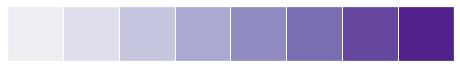

In [42]:
sns.palplot(sns.color_palette("Purples", 8))
plt.show()

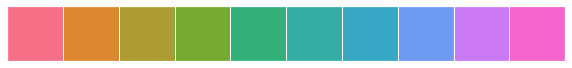

In [43]:
sns.palplot(sns.color_palette("husl",10))
plt.show()

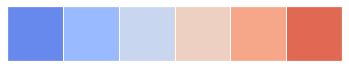

In [44]:
sns.palplot(sns.color_palette("coolwarm",6))
plt.show()

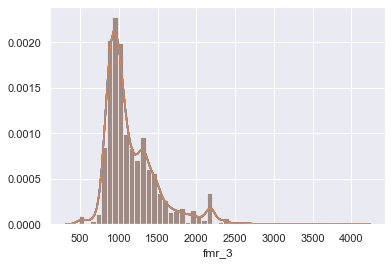

In [49]:
for p in sns.palettes.SEABORN_PALETTES:     
    sns.set_palette(p)    
    sns.distplot(us_housing['fmr_3'])

### Customizing with matplotlib

[Text(0.5, 0, '3 Bedroom Fair Market Rent')]

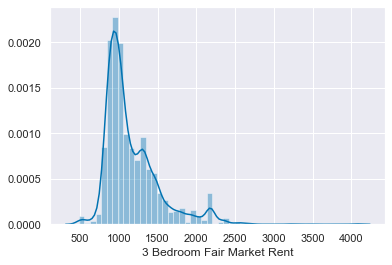

In [52]:
fig, ax = plt.subplots()
sns.distplot(us_housing['fmr_3'], ax=ax)
ax.set(xlabel="3 Bedroom Fair Market Rent")

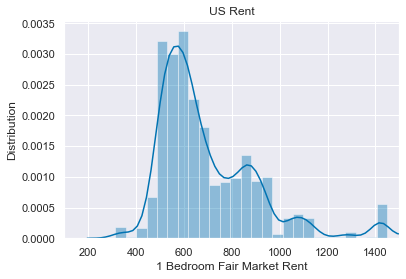

In [56]:
fig, ax = plt.subplots()
sns.distplot(us_housing['fmr_1'], ax=ax)

ax.set(xlabel="1 Bedroom Fair Market Rent",
       ylabel="Distribution",
       xlim=(100,1500),
       title="US Rent")
plt.show()

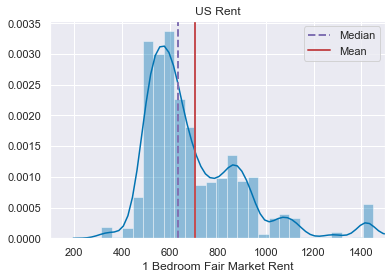

In [58]:
fig, ax = plt.subplots()
sns.distplot(us_housing['fmr_1'], ax=ax)

ax.set(xlabel="1 Bedroom Fair Market Rent",
 xlim=(100,1500), title="US Rent")

ax.axvline(x=634, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=706.3254351016984, color='r', label='Mean', linestyle='-', linewidth=2)

ax.legend()
plt.show()

In [ ]:
# fig, (ax0, ax1) = plt.subplots(
#     nrows=1,ncols=2, sharey=True, figsize=(7,4))

# sns.distplot(df['Tuition'], ax=ax0)
# sns.distplot(df.query('State == "MN"')['Tuition'], ax=ax1)

# ax1.set(xlabel="Tuition (MN)", xlim=(0, 70000))
# ax1.axvline(x=20000, label='My Budget', linestyle='--')
# ax1.legend()

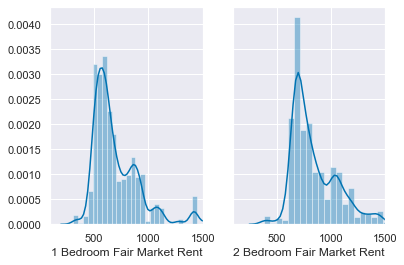

In [59]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.distplot(us_housing['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

sns.distplot(us_housing['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

plt.show()

# 3. Additional Plot Types

### Categorical Plot Types

In [ ]:
# SEABORN DIVIDE LAS TRAMAS DE DATOS CATEGORICOS EN 3 GRUPOS:
# > stripplot(), swarmplot()  => Muestra todas las observaciones individuales
# > boxplot, violinplot, lvplot() => Muestra una representacion abstracta 
# > barplot, pointplot, countplot => Muestra las estimaciones estadisticas

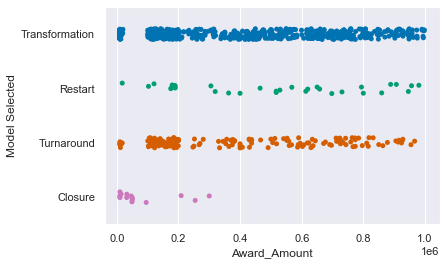

In [67]:
sns.stripplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         jitter=True) # jitter => No adjuntar los datos
plt.show()

In [2]:
df.head(3)

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West


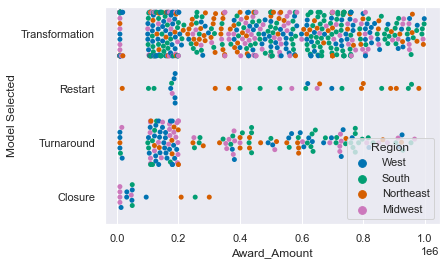

In [68]:
sns.swarmplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         hue='Region')
plt.show()

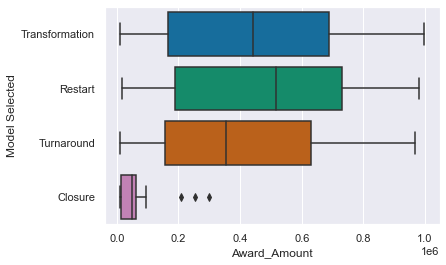

<Figure size 432x288 with 0 Axes>

In [69]:
sns.boxplot(data=df,
          x='Award_Amount',
         y='Model Selected')

plt.show()
plt.clf()

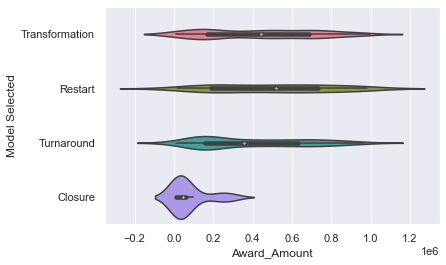

<Figure size 432x288 with 0 Axes>

In [70]:
sns.violinplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         palette='husl')
plt.show()
plt.clf()

C:\Users\Skull\anaconda3\lib\site-packages\seaborn\categorical.py:2613: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


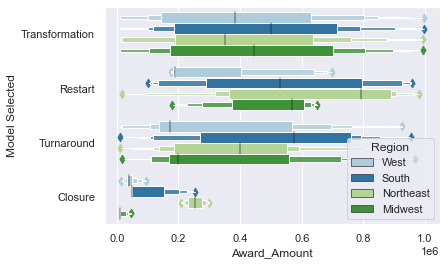

<Figure size 432x288 with 0 Axes>

In [71]:
sns.lvplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         palette='Paired',
         hue = 'Region')

plt.show()
plt.clf()

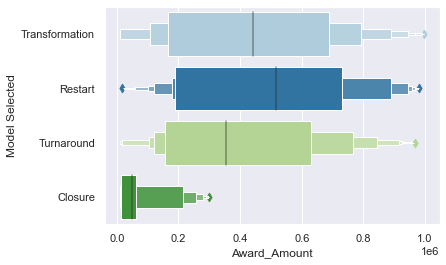

<Figure size 432x288 with 0 Axes>

In [72]:
sns.lvplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         palette='Paired')

plt.show()
plt.clf()

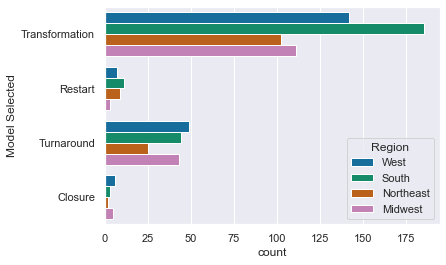

<Figure size 432x288 with 0 Axes>

In [73]:
sns.countplot(data=df,
         y="Model Selected",
         hue="Region")

plt.show()
plt.clf()

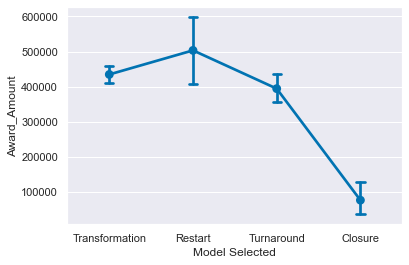

<Figure size 432x288 with 0 Axes>

In [78]:
sns.pointplot(data=df,
            x='Model Selected',
            y='Award_Amount',
#             hue='Region',
            capsize=.1) # Tope

plt.show()
plt.clf()

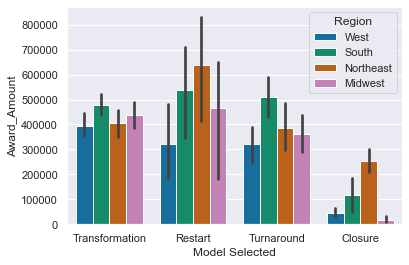

<Figure size 432x288 with 0 Axes>

In [75]:
sns.barplot(data=df,
         y='Award_Amount',
         x='Model Selected',
         hue='Region')

plt.show()
plt.clf()

### Regression Plots

In [ ]:
# La grafica residual comprender la idoneidad de un modelo de regresión
#                     representar los valores residuales aleatoriamenre a la linea horizontal
# sns.residplot(data=df, x='temp', y='total_rentals')

In [88]:
# df.head()

In [87]:
# us_worst_drives.head()

In [86]:
# us_housing.head()

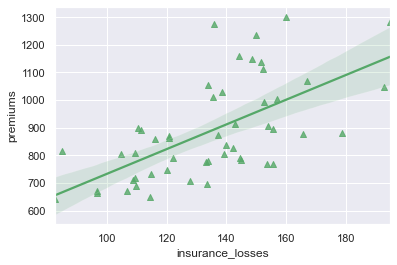

<Figure size 432x288 with 0 Axes>

In [83]:
sns.regplot(data=us_worst_drives,
             y='premiums',
             x="insurance_losses",
             marker='^',
             color='g')
plt.show()
plt.clf()

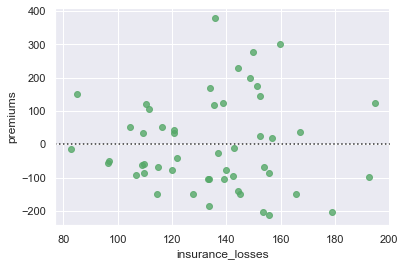

<Figure size 432x288 with 0 Axes>

In [85]:
# residplot => Para saber si la relacion es lineal
sns.residplot(data=us_worst_drives,
            y='premiums',
            x="insurance_losses",
            color='g')
plt.show()
plt.clf()

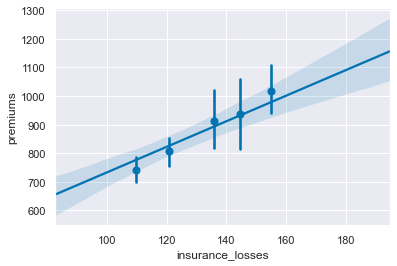

<Figure size 432x288 with 0 Axes>

In [90]:
sns.regplot(data=us_worst_drives,
            y='premiums',
            x="insurance_losses",
            x_bins=5) # Divide la data en 5 grupos
plt.show()
plt.clf()

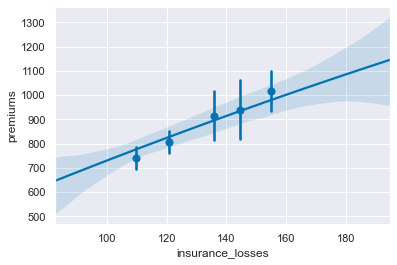

<Figure size 432x288 with 0 Axes>

In [92]:
sns.regplot(data=us_worst_drives,
            y='premiums',
            x="insurance_losses",
            x_bins=5,
            order=2) # Polinomio de 2do orden
plt.show()
plt.clf()

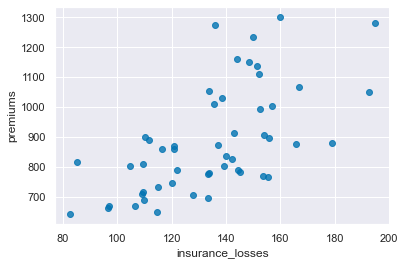

<Figure size 432x288 with 0 Axes>

In [93]:
sns.regplot(data=us_worst_drives,
            y='premiums',
            x="insurance_losses",
            fit_reg=False) # DESHABILITA LA REGRESION LINEAL
plt.show()
plt.clf()

In [ ]:
# CATEGORIAL || Estimators
# sns.regplot(data=df, x='...', y='...', x_jitter=.1, order=2)
# sns.regplot(data=df, x='...', y='...', x_estimator=np.mean, order=2)

### Matrix plots

In [ ]:
# annot = True => Activar las anotaciones en las celdas individuales
# fmt => Garantiza que los resultados se muestren enteros
# cbar = False => La barra de color no se muestra
# linewidths => espaciado entre celdas

In [96]:
daily_show_guests.head(3)

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman


YEAR            1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Group                                                                        
Academic           0     0     2     0     4     1    12     9    13     5   
Acting           108   100    92    84    74    51    44    44    25    26   
Advocacy           0     1     0     1     0     4     0     0     2     3   
Athletics          0     3     1     2     0     2     2     5     4     1   
Business           0     1     0     0     0     2     1     1     2     1   
Clergy             0     0     0     1     1     1     0     0     1     0   
Comedy            25    12    11     5    12     7     5     8     9     7   
Consultant         0     0     0     0     1     4     1     4     2     3   
Government         0     0     2     1     2     3     1     3     1     0   
Media             11    21    31    42    41    45    54    47    47    77   
Military           0     0     0     0     0     0     1     1  

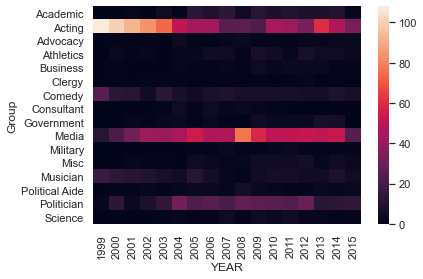

In [95]:
pd_crosstab = pd.crosstab(daily_show_guests["Group"], daily_show_guests["YEAR"])
print(pd_crosstab)

sns.heatmap(pd_crosstab)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# VALORES
# pd.crosstab(daily_show_guests["Group"], daily_show_guests["YEAR"],
#             values=df["total_rentals"],aggfunc='mean').round(0)

# GRAFICO DE CALOR
# sns.heatmap(pd.crosstab(df["mnth"], df["weekday"],            
#                         values=df["total_rentals"], aggfunc='mean'))


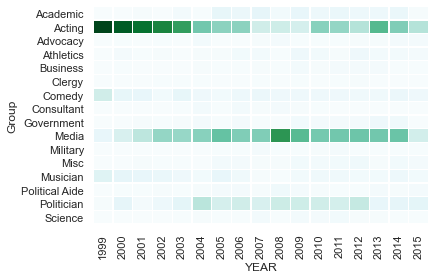

<Figure size 432x288 with 0 Axes>

In [101]:
pd_crosstab = pd.crosstab(daily_show_guests["Group"], daily_show_guests["YEAR"])

sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()
plt.clf()

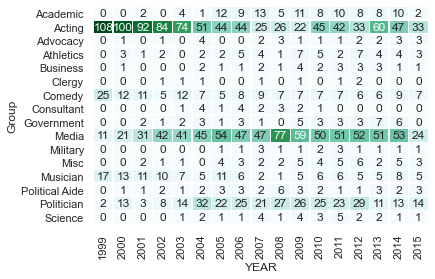

<Figure size 432x288 with 0 Axes>

In [104]:
sns.heatmap(pd_crosstab, cbar=False, linewidths=0.3, annot = True, fmt="d",cmap="BuGn")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()
plt.clf()

In [110]:
# sns.heatmap(pd_crosstab, annot=True, fmt="d",            
#             cmap="YlGnBu", cbar=True,            
#             center=pd_crosstab.loc[9, 6])

# sns.heatmap(daily_show_guests.corr())

# 4. Creating Plots on Data Aware Grids

### Using FacetGrid, factorplot and lmplot

C:\Users\Skull\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


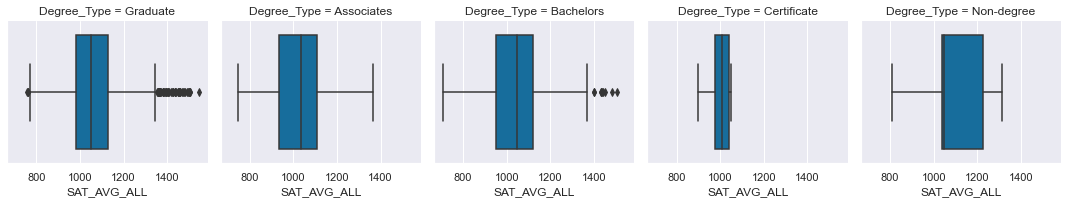

<Figure size 432x288 with 0 Axes>

In [116]:
df = college
g2 = sns.FacetGrid(df, 
             col="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

g2.map(sns.boxplot, 'SAT_AVG_ALL')
plt.show()
plt.clf()

C:\Users\Skull\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


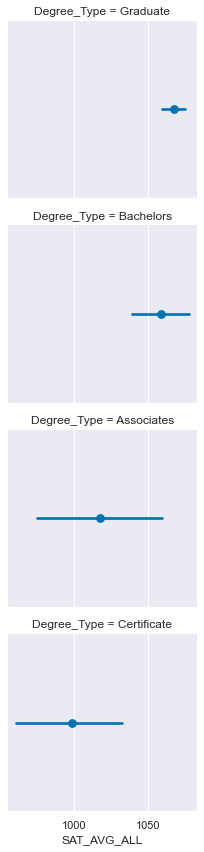

<Figure size 432x288 with 0 Axes>

In [120]:
g2 = sns.FacetGrid(df, 
             row="Degree_Type", # col ="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])
g2.map(sns.pointplot, 'SAT_AVG_ALL')
plt.show()
plt.clf()

C:\Users\Skull\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


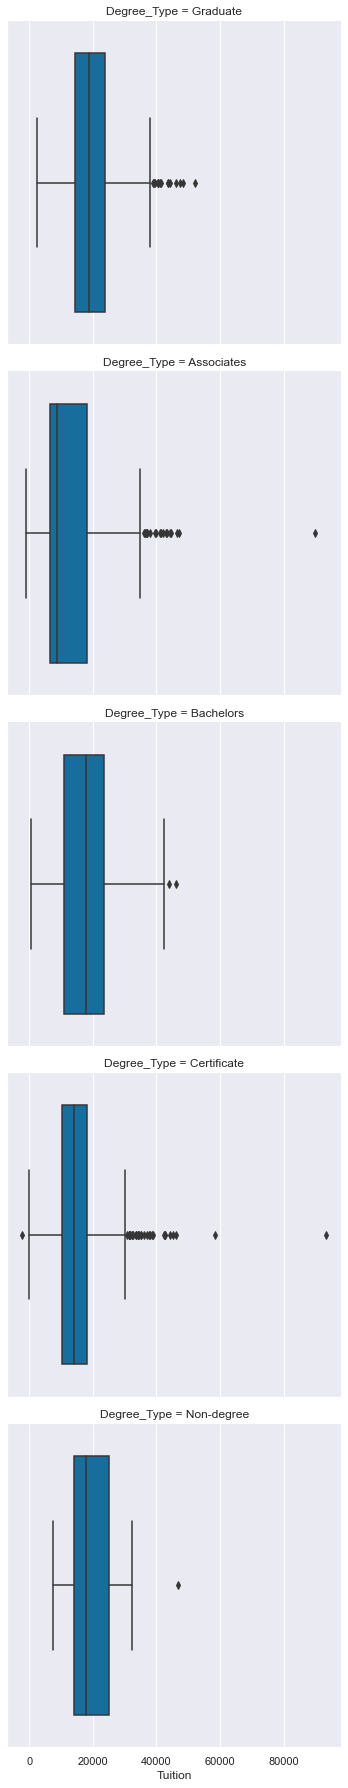

<Figure size 432x288 with 0 Axes>

In [121]:
sns.factorplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

C:\Users\Skull\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


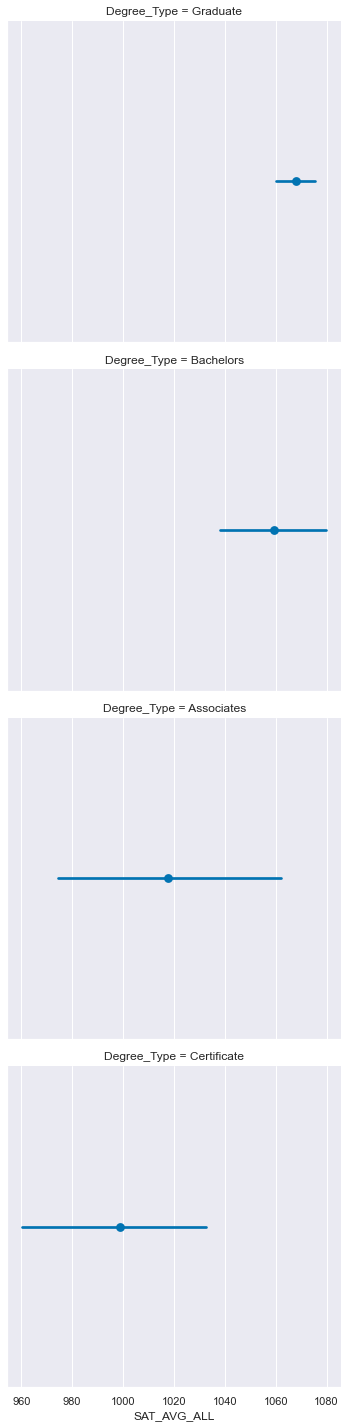

<Figure size 432x288 with 0 Axes>

In [122]:
sns.factorplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

In [ ]:
# DATO
# factorplot suele ser más conveniente que usar FacetGrid 
# para crear cuadrículas con reconocimiento de datos. 

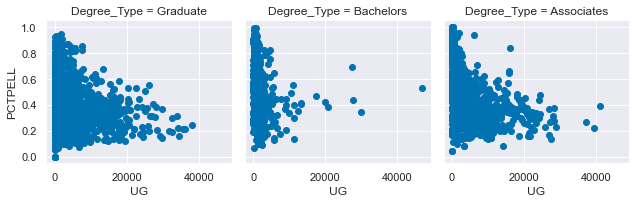

In [125]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)
g.map(plt.scatter, 'UG', 'PCTPELL')

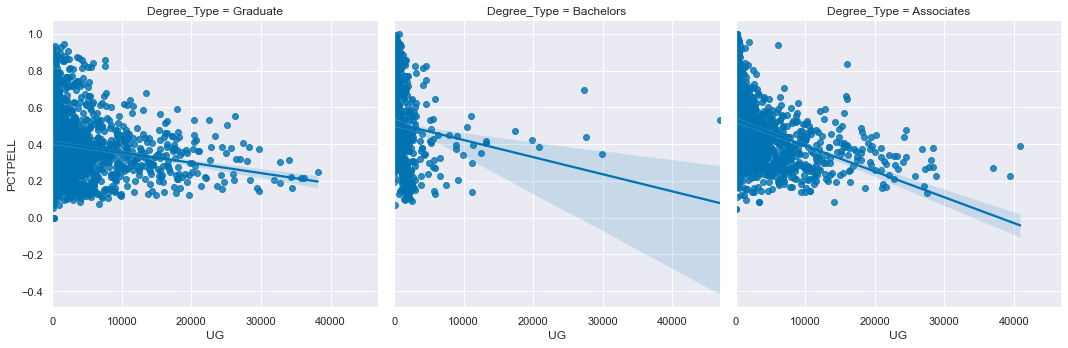

<Figure size 432x288 with 0 Axes>

In [126]:
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

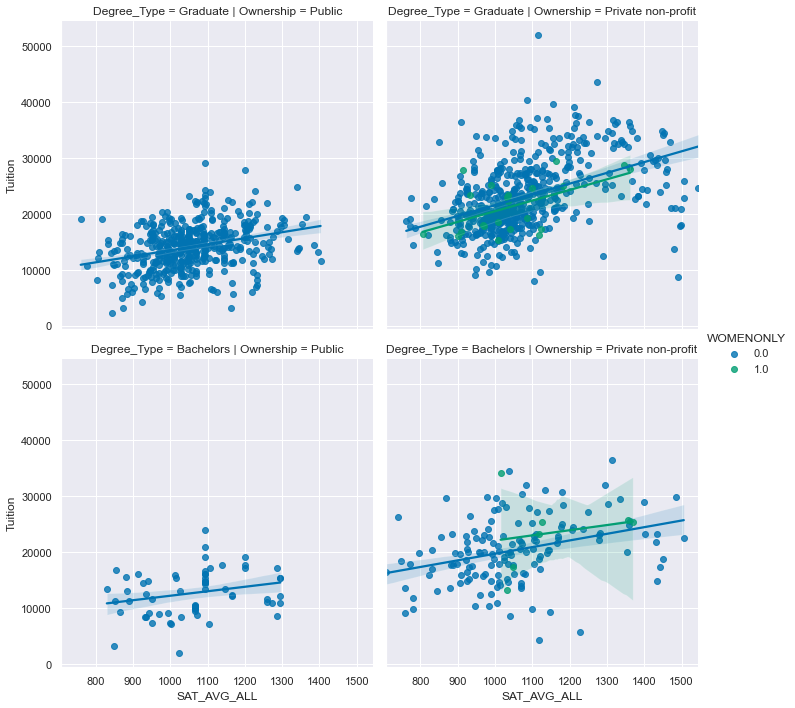

<Figure size 432x288 with 0 Axes>

In [128]:
inst_ord = ['Public', 'Private non-profit']

sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

### Using PairGrid and pairplot

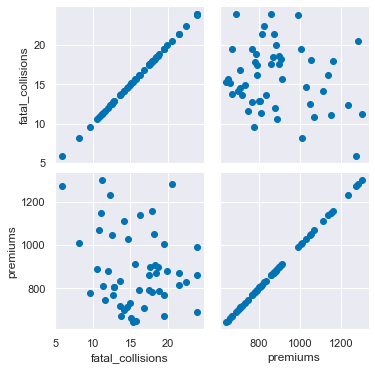

<Figure size 432x288 with 0 Axes>

In [132]:
df = us_worst_drives
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

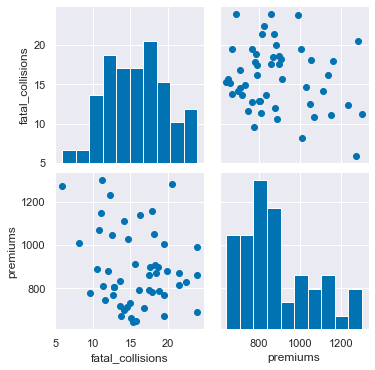

<Figure size 432x288 with 0 Axes>

In [133]:
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)
plt.show()
plt.clf()

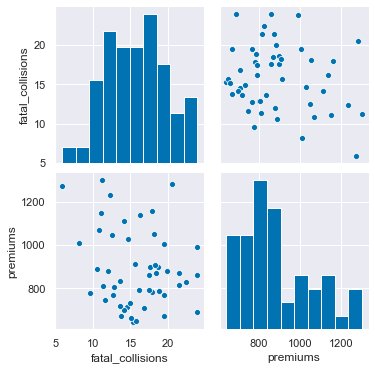

<Figure size 432x288 with 0 Axes>

In [134]:
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')
plt.show()
plt.clf()

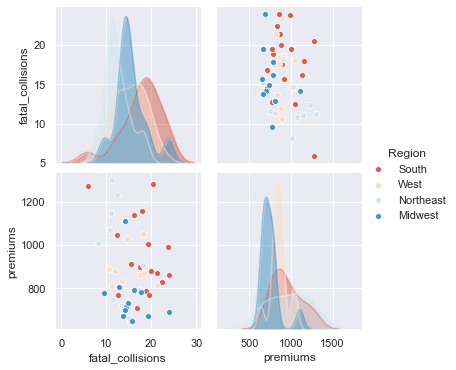

<Figure size 432x288 with 0 Axes>

In [136]:
sns.pairplot(data=df, #df.query('BEDRMS < 3')
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

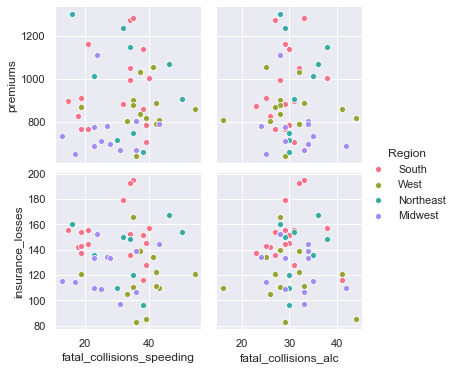

<Figure size 432x288 with 0 Axes>

In [137]:
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

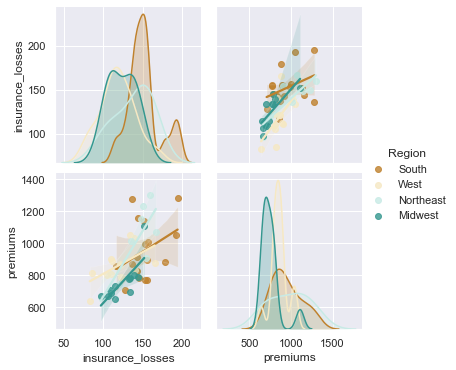

<Figure size 432x288 with 0 Axes>

In [138]:
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

### Using JointGrid and jointplot

In [ ]:
# JointGrid => Permite comparar la distribucion de datos entre 2 variables 
#              diagrama de dispersion, distribucion, lineas de regresion, histogramas,
#              estimadores de densidad
# 

In [ ]:
# plot_joint(sns.kdeplot) => Se debe unir un diagrama kde en el centro
# plot_annotate() => Para definir informacion adicional sobre la relacion de las variables

In [141]:
df = bike_share

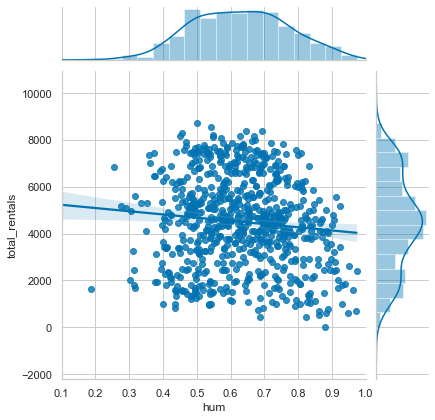

<Figure size 432x288 with 0 Axes>

In [148]:
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 
g.plot(sns.regplot, sns.distplot)
plt.show()
plt.clf()

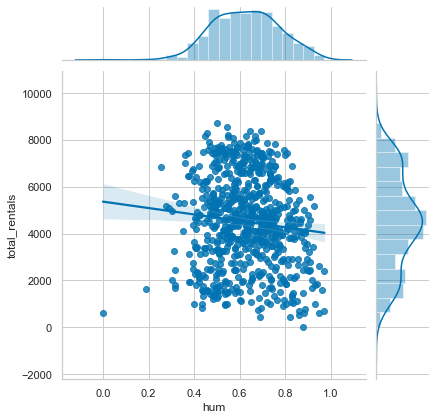

<Figure size 432x288 with 0 Axes>

In [149]:
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()
plt.clf()

# No me mostro las estadisticas de person y p !!!

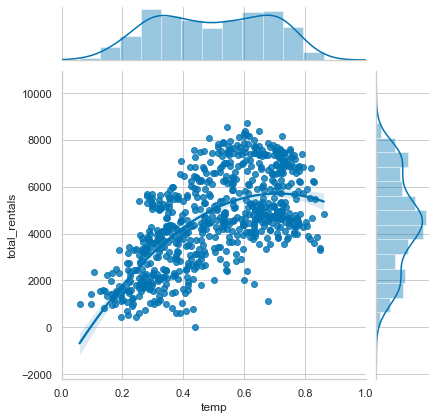

<Figure size 432x288 with 0 Axes>

In [151]:
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

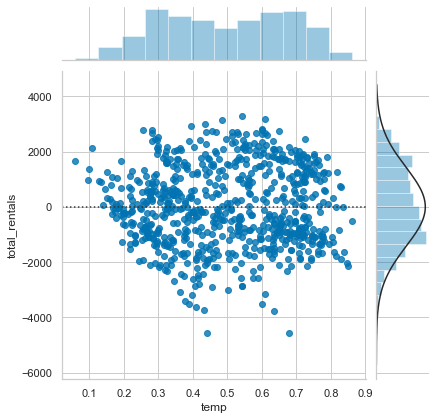

<Figure size 432x288 with 0 Axes>

In [152]:
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=df,
        order=2)

plt.show()
plt.clf()

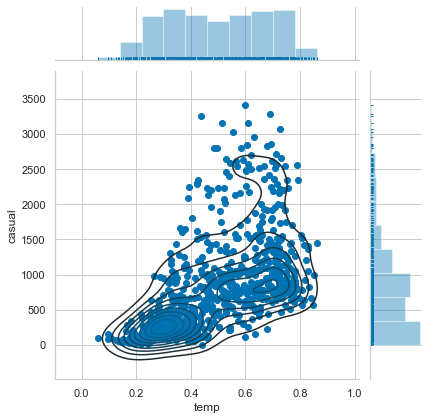

<Figure size 432x288 with 0 Axes>

In [154]:
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

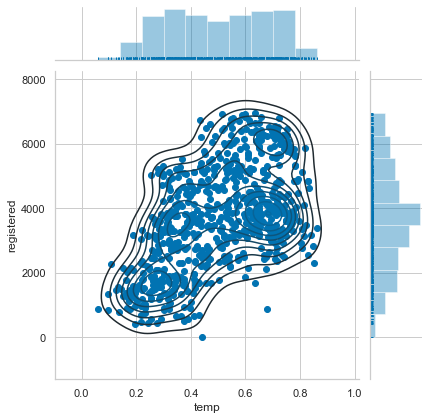

<Figure size 432x288 with 0 Axes>

In [155]:
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf() # NO MOSTRO LAS ESTADISTICAS !!

### Selecting Seaborn Plots
